Import Necessary Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Load and Preprocess the Dataset


In [2]:
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

# Drop 'SkinThickness' column due to irrelevance or high missing values
df.drop(['SkinThickness'], axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Exploratory Data Analysis (EDA)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None
       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      3.845052  120.894531      69.105469   79.799479   31.992578   
std       3.369578   31.972618      19.355807  115.244002    7.884160  

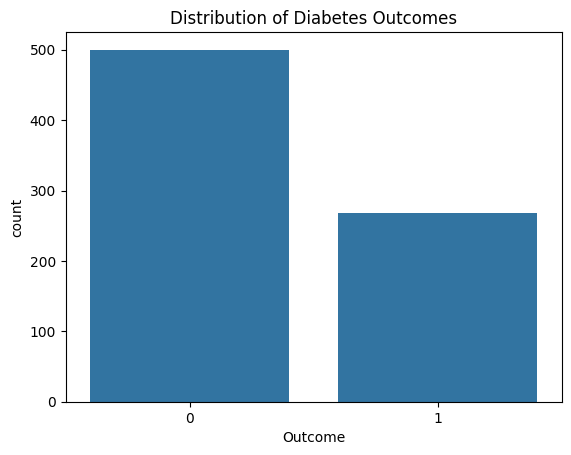

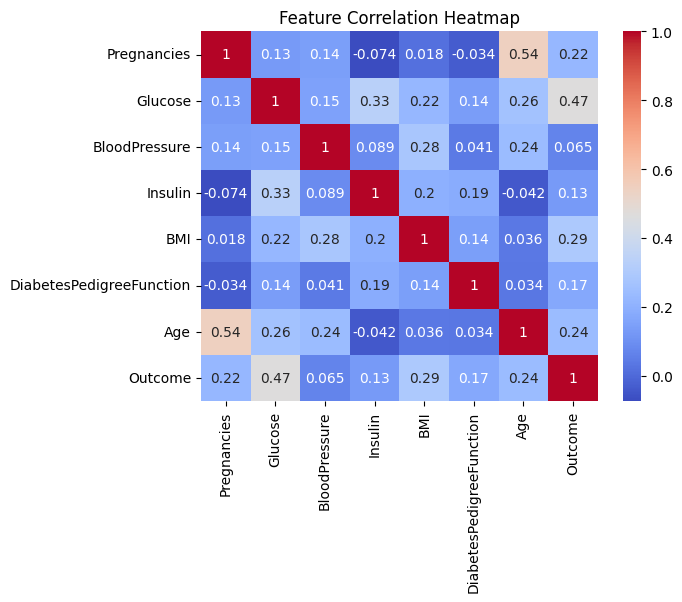

In [3]:
# Display basic data information and statistics
print(df.info())
print(df.describe())

# Check for null values
print(df.isnull().sum())

# Analyze the distribution of the target variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.show()

# Correlation heatmap to understand feature relationships
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Model Training and Evaluation


In [4]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print(f'Logistic Regression Precision: {precision_log_reg}')
print(f'Logistic Regression Recall: {recall_log_reg}')
print(f'Logistic Regression F1 Score: {f1_score_log_reg}')
print(f'Logistic Regression ROC-AUC Score: {roc_auc_log_reg}')


Logistic Regression Accuracy: 0.7532467532467533
Logistic Regression Precision: 0.6491228070175439
Logistic Regression Recall: 0.6727272727272727
Logistic Regression F1 Score: 0.6607142857142858
Logistic Regression ROC-AUC Score: 0.8135904499540864
